In [20]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import os
from corner import hist2d
from scipy.io.idl import readsav

%matplotlib notebook

In [6]:
#Reference files
mg_ref = Table.read('Catalogs/moving_groups_ref.csv')
file_source_ref = Table.read('Catalogs/source_ref.csv')
#Data files
mg_confirmed = fits.open('Catalogs/literature_search_mg.fits')
mg_gaia = fits.open('Catalogs/literature_search_compatible_gaia.fits')
mg_all = fits.open('Catalogs/literature_search.fits')

In [7]:
bins_name = np.array(mg_ref['name'])
bins_num = np.array(mg_ref['group_num'])

In [31]:
mask_compatible = (~np.isnan(mg_confirmed[1].data['ewha'])) 

In [32]:
for x in np.isnan(mg_confirmed[1].data['group_num']):
    if(x==True):
        print(x)

<IPython.core.display.Javascript object>


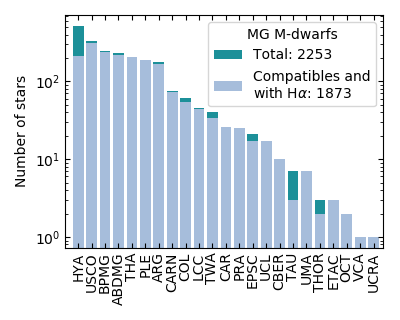

In [37]:
#Plot histogram of Moving groups
labels = bins_name
x2 = bins_num

N = len(bins_name) 
bins= np.arange(1,N+1)
y,bin_edges = np.histogram(mg_confirmed[1].data['group_num'],bins=bins)
idx = np.flip(np.argsort(y))
y1,x1 = y[idx],bin_edges[idx]

y_compatible,bin_edges_compatible = np.histogram(mg_confirmed[1].data['group_num'][mask_compatible],bins=bins)

n_compatible = len(mg_confirmed[1].data['group_num'][mask_compatible])

plt.figure(figsize=(4,3.2))
plt.bar(bins[:-1],y1,label='Total: {}'.format(len(mg_confirmed[1].data['group_num'])),
        color='#1c9099')
plt.bar(bins[:-1],y_compatible[idx],label='Compatibles and\n'+r'with H$\alpha$: {}'.format(n_compatible),
        color='#a6bddb')
plt.xticks(bins[:-1], labels[idx], rotation=90)
plt.yscale('log')
plt.xlim(0,23.7)
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('y',which='minor',direction='in',right=True)
plt.ylabel('Number of stars')
plt.legend(title='MG M-dwarfs')
plt.tight_layout()
plt.savefig('/Users/rociokiman/Dropbox (Personal)/Apps/Overleaf/Age-Activity Relation for M dwarfs/Mdwarfpergroup.png',
            dpi=300,tight_layout=True)
plt.show()


<IPython.core.display.Javascript object>


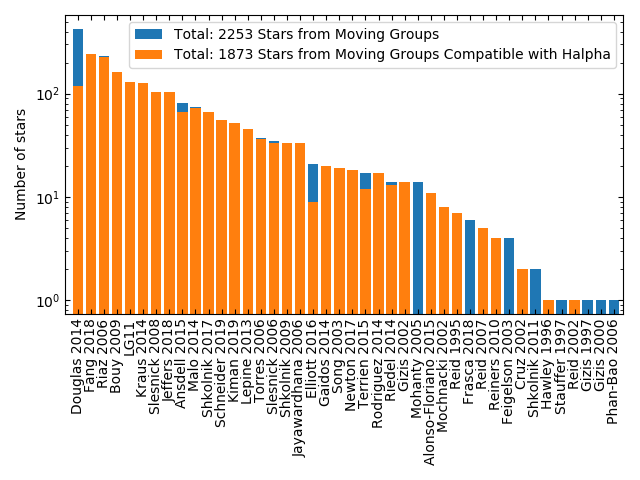

In [36]:
#Histogram of the sources
labels_source = file_source_ref['source_ref']
x2_source = file_source_ref['source_ref']

N = len(file_source_ref['source_ref'])
bins= np.arange(0,N)
y,bin_edges = np.histogram(mg_confirmed[1].data['source_num'],bins=bins)
idx = np.flip(np.argsort(y))
y1,x1 = y[idx],bin_edges[idx]

y_compatible,bin_edges_compatible = np.histogram(mg_confirmed[1].data['source_num'][mask_compatible],bins=bins)

plt.bar(bins[:-1],y1,label='Total: {} Stars from Moving Groups'.format(len(mg_confirmed[1].data['source_num'])))
plt.bar(bins[:-1],y_compatible[idx],label='Total: {} Stars from Moving Groups Compatible with Halpha'.format(len(mg_confirmed[1].data['source_num'][mask_compatible])))
plt.xticks(bins, labels_source[idx], rotation=90)
plt.yscale('log')
plt.xlim(-1,41.7)
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('y',which='minor',direction='in',right=True)
plt.ylabel('Number of stars')
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
mask = mg_confirmed[1].data['ewha_all'] > 0

age = mg_confirmed[1].data['age']*1e6
age_error = mg_confirmed[1].data['age_error']*1e6
spt = mg_confirmed[1].data['spt']
ewha = mg_confirmed[1].data['ewha']
ewha_err = mg_confirmed[1].data['ewha_error']
group_num = mg_confirmed[1].data['group_num']
group_name = mg_confirmed[1].data['group_name']
source_num = mg_confirmed[1].data['source_num']
source_ref = mg_confirmed[1].data['source_ref']
g = mg_confirmed[1].data['phot_g_mean_mag']
rp = mg_confirmed[1].data['phot_rp_mean_mag']
g_rp = g-rp
parallax = mg_confirmed[1].data['parallax']
g_abs = mg_confirmed[1].data['phot_g_mean_mag'] - 5*(np.log10(1e3/parallax)-1)

In [35]:
target_url = 'https://zenodo.org/record/2636692/files/MLSDSS-GaiaDR2_extended.fits?download=1'
mlsdss = fits.open(target_url)

In [36]:
r_ext = mlsdss[1].data['EXTINCTION'][:,2]
z_ext = mlsdss[1].data['EXTINCTION'][:,4]
ext = r_ext-z_ext
subred = mlsdss[1].data['photometric_sample_subred'] == 1
mask_ext = ext < 0.1

G_ml = mlsdss[1].data['phot_g_mean_mag'][subred*mask_ext]
RP_ml = mlsdss[1].data['phot_rp_mean_mag'][subred*mask_ext]
G_RP_ml = G_ml-RP_ml
parallax_ml = mlsdss[1].data['parallax'][subred*mask_ext]
dist_ml = 1e3/parallax_ml
G_abs_ml = G_ml + 5.0 - 5.0*np.log10(dist_ml)

In [37]:
PLE_model = readsav('Catalogs/Models/dr2_seq_fit_cf_PLE.sav')
BPMG_THOR_model = readsav('Catalogs/Models/dr2_seq_fit_cf_BPMG_THOR.sav')
HYA_model = readsav('Catalogs/Models/dr2_seq_fit_cf_HYA.sav')
CBER_model = readsav('Catalogs/Models/dr2_seq_fit_cf_CBER.sav')
TWA_model = readsav('Catalogs/Models/dr2_seq_fit_cf_TWA.sav')
THA_model = readsav('Catalogs/Models/dr2_seq_fit_cf_THA_COL_CAR.sav')
USCO_model = readsav('Catalogs/Models/dr2_seq_fit_cf_USCO_LCC_UCL.sav')

In [38]:
N = 30
x_ple = np.linspace(PLE_model['color_range'][0],PLE_model['color_range'][1],N)
y_ple = np.polyval(np.flipud(PLE_model['cf']),x_ple)

x_bpmg_thor = np.linspace(BPMG_THOR_model['color_range'][0],BPMG_THOR_model['color_range'][1],N)
y_bpmg_thor = np.polyval(np.flipud(BPMG_THOR_model['cf']),x_bpmg_thor)

x_hya = np.linspace(HYA_model['color_range'][0],HYA_model['color_range'][1],N)
y_hya = np.polyval(np.flipud(HYA_model['cf']),x_hya)

x_cber = np.linspace(CBER_model['color_range'][0],CBER_model['color_range'][1],N)
y_cber = np.polyval(np.flipud(CBER_model['cf']),x_cber)

x_twa = np.linspace(TWA_model['color_range'][0],TWA_model['color_range'][1],N)
y_twa = np.polyval(np.flipud(TWA_model['cf']),x_twa)

x_tha = np.linspace(THA_model['color_range'][0],THA_model['color_range'][1],N)
y_tha = np.polyval(np.flipud(THA_model['cf']),x_tha)

x_usco = np.linspace(USCO_model['color_range'][0],USCO_model['color_range'][1],N)
y_usco = np.polyval(np.flipud(USCO_model['cf']),x_usco)

<IPython.core.display.Javascript object>


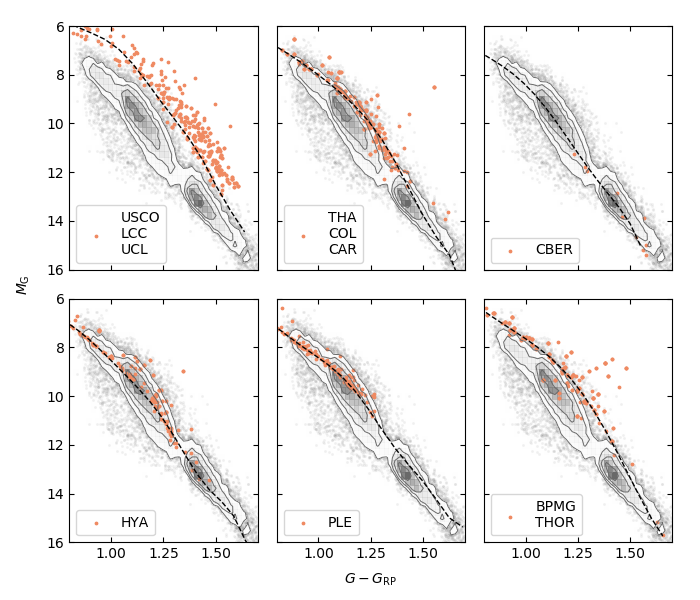

In [40]:
contour_color = 'dimgray'
s = 3
color = '#ef8a62'
color_fit = 'k'
lw =1
loc=3

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,sharex=True,sharey=True,figsize=(7,6))

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},ax=ax1)
#ax1.plot([0,0],[0,0],'-',color=contour_color,label='Kiman et al. 2019')
mask_usco = np.logical_or(group_name=='USCO',group_name=='LCC',group_name=='UCL')
ax1.scatter(g_rp[mask_usco],g_abs[mask_usco],s=s,label='USCO\nLCC\nUCL',
            color=color)
ax1.plot(x_usco,y_usco,'--',color=color_fit,linewidth=lw)
ax1.tick_params('both',direction='in',top=True,right=True)
ax1.tick_params('y',which='minor',direction='in',right=True)
ax1.legend(loc=loc)

hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},ax=ax2)
mask_tha = np.logical_or(group_name=='THA',group_name=='COL',group_name=='CAR')
ax2.scatter(g_rp[mask_tha],g_abs[mask_tha],s=s,label='THA\nCOL\nCAR',
            color=color)
ax2.plot(x_tha,y_tha,'--',color=color_fit,linewidth=lw)
ax2.tick_params('both',direction='in',top=True,right=True)
ax2.tick_params('y',which='minor',direction='in',right=True)
ax2.legend(loc=loc)

hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},ax=ax3)
ax3.scatter(g_rp[group_name=='CBER'],g_abs[group_name=='CBER'],s=s,label='CBER',
            color=color)
ax3.plot(x_cber,y_cber,'--',color=color_fit,linewidth=lw)
ax3.tick_params('both',direction='in',top=True,right=True)
ax3.tick_params('y',which='minor',direction='in',right=True)
ax3.legend(loc=loc)

hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},ax=ax4)
ax4.scatter(g_rp[group_name=='HYA'],g_abs[group_name=='HYA'],s=s,label='HYA',
            color=color)
ax4.plot(x_hya,y_hya,'--',color=color_fit,linewidth=lw)
ax4.tick_params('both',direction='in',top=True,right=True)
ax4.tick_params('y',which='minor',direction='in',right=True)
ax4.legend(loc=loc)

hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},ax=ax5)
ax5.scatter(g_rp[group_name=='PLE'],g_abs[group_name=='PLE'],s=s,label='PLE',
            color=color)
ax5.plot(x_ple,y_ple,'--',color=color_fit,linewidth=lw)
ax5.tick_params('both',direction='in',top=True,right=True)
ax5.tick_params('y',which='minor',direction='in',right=True)
ax5.legend(loc=loc)

hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},ax=ax6)
mask_bpmg = np.logical_or(group_name=='BPMG',group_name=='THOR')
ax6.scatter(g_rp[mask_bpmg],g_abs[mask_bpmg],s=s,label='BPMG\nTHOR',
            color=color)
ax6.plot(x_bpmg_thor,y_bpmg_thor,'--',color=color_fit,linewidth=lw)
ax6.tick_params('both',direction='in',top=True,right=True)
ax6.tick_params('y',which='minor',direction='in',right=True)
ax6.set_ylim(16,6)
ax6.set_xlim(0.8,1.7)
ax6.legend(loc=loc)

plt.tight_layout()
plt.xlabel(r'$G-G_{\rm RP}$')
plt.ylabel(r'$M_{\rm G}$')

plt.savefig('/Users/rociokiman/Dropbox (Personal)/Apps/Overleaf/Age-Activity Relation for M dwarfs/ModelsGroups.png',
            dpi=300,tight_layout=True)

plt.show()

<IPython.core.display.Javascript object>


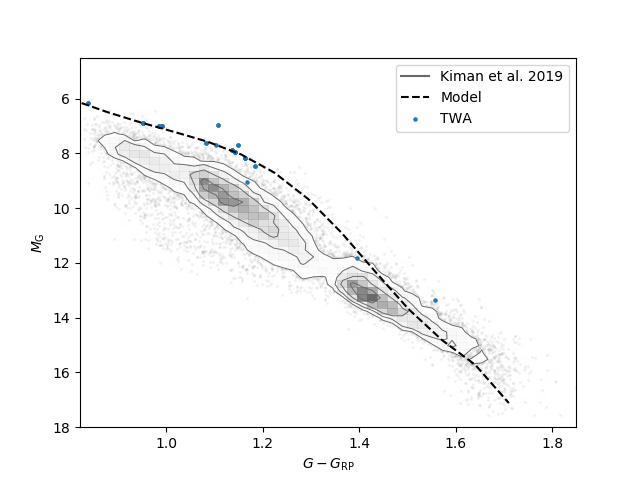

In [98]:
contour_color = 'dimgray'

hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7})
plt.plot([0,0],[0,0],'-',color=contour_color,label='Kiman et al. 2019')
plt.scatter(g_rp[group_name=='TWA'],g_abs[group_name=='TWA'],s=5,label='TWA')
plt.plot(x_twa,y_twa,'--k',label='Model')
#plt.xlim(0.75,1.9)
plt.ylim(18,4.5)
plt.xlabel(r'$G-G_{\rm RP}$')
plt.ylabel(r'$M_{\rm G}$')
plt.legend()
plt.show()

# Summary table 

### Sources

In [11]:
os.remove('/Users/rociokiman/Dropbox/Apps/Overleaf/Age-Activity Relation for M dwarfs/sources_summary.tex')
file_sources = open('/Users/rociokiman/Dropbox/Apps/Overleaf/Age-Activity Relation for M dwarfs/sources_summary.tex','x')

In [12]:
spt_all_confirmed = mg_confirmed[1].data['spt']
source_num_all_confirmed = mg_confirmed[1].data['source_num']
total_incompatible = 0
papers_notes = 'Other works checked in literature search: '
n_sources = len(file_source_ref['source_ref'])
#Header
file_sources.write('\\begin{deluxetable*}{cccc}[ht!]\n')
file_sources.write('\\tablecaption{References for $\haew$ from Moving Groups. \\label{table:source_ref}}\n')
file_sources.write('\\tablehead{\\colhead{Reference} & \\colhead{Resolution} & \\colhead{$N$ Stars Compatible} & \\colhead{$N$ Stars} \\\ & & Total='+str(len(spt_all_confirmed[mask_compatible])) +'& Total='+ str(len(spt_all_confirmed))+'\n}')
file_sources.write('\\startdata \n')

for i in range(n_sources):
    mask_group1 = source_num_all_confirmed==file_source_ref['source_num'][i]
    if(len(source_num_all_confirmed[mask_group1])!=0):
        file_sources.write('{} &{}&{}&{}\\\ \n'.format(file_source_ref['cite'][i],file_source_ref['resolution'][i],
                                               len(spt_all_confirmed[mask_compatible*mask_group1]),len(spt_all_confirmed[mask_group1]))) 
    elif(len(source_num_all_confirmed[mask_group1])==0):
        total_incompatible += len(source_num_all_confirmed[source_num_all_confirmed==file_source_ref['source_num'][i]])
        papers_notes = papers_notes + file_source_ref['cite'][i] + ', '

file_sources.write('\\enddata \n')
file_sources.write('\\tablecomments{'+ papers_notes +'.} \n')
file_sources.write('\\end{deluxetable*}\n')

19

In [13]:
file_sources.close()

### Moving groups

In [56]:
os.remove('/Users/rociokiman/Dropbox/Apps/Overleaf/Age-Activity Relation for M dwarfs/mgsummary.tex')

In [57]:
file_mg = open('/Users/rociokiman/Dropbox/Apps/Overleaf/Age-Activity Relation for M dwarfs/mgsummary.tex','x')

In [58]:
len(age)

324

In [59]:
file_mg.write('\\begin{deluxetable*}{ccccc}[ht!]\n')
file_mg.write('\\tablecaption{Moving Groups Summary. \\label{table:mgsum}}\n')
file_mg.write('\\tablehead{\\colhead{Moving Group} & \\colhead{$N$ Stars} & \\colhead{Source Papers} & \\colhead{Age (Myr)} & \\colhead{Ref. Age} \\\ & Total:'+ str(len(age))+' &  &  & \n}')
file_mg.write('\\startdata \n')
n = len(mg_ref['name'])
for i in range(n):
    mask_group = group_num==mg_ref['group_num'][i]
    if(len(age[mask_group])!=0):
        file_mg.write('{} &{}&{}& ${}\pm {}$&{}\\\ \n'.format(mg_ref['name'][i],
                                                             len(age[mask_group]),
                                                             np.unique(source_num[mask_group]),
                                                             mg_ref['age'][i],mg_ref['age_error'][i],
                                                             mg_ref['ref_age'][i]))  
file_mg.write('\\enddata \n')
file_mg.write('\\tablecomments{Groups.} \n')
file_mg.write('\\end{deluxetable*}\n')

19

In [60]:
file_mg.close()